<b>Problem Statement - </b>Given various fratures about a customer like Age, Incomme,Loan_Amount,Loan_Intent, Home_Ownership etc....,predict if in case the loan is given, will the customer default or not on the loan payments.

<b>Task -</b>Prepare the data and build a model to predict if a customer is going to default or not on the Loan payments.

<b>Step -1:</b>Loading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv("E:/Data Base/credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [4]:
df.shape

(32581, 12)

In [5]:
df = df[~(np.isnan(df['person_emp_length']))]

In [6]:
df = df[~(np.isnan(df['loan_int_rate']))]
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [7]:
df.shape

(28638, 12)

- person_age :                Age
- person_income : Annual income
- person_home_ownership : Home ownership
- person_emp_length : Employment length (in years)
- loan_intent : Loan intent
- loan_grade : likelihood of the repayment.
- loan_amnt : Loan amount
- loan_int_rate : Interest rate
- loan_status : Loan status (0 is non default 1 is default)
- loan_percent_income : Percent income
- cb_person_default_on_file : Historical default
- cb_preson_cred_hist_length : Credit history length

<b>Step -2:</b>Document the below mentioned points properly:
- Identify the input and output/target variables.

In [8]:
x = df[['person_age','person_income','person_home_ownership','person_emp_length','loan_intent','loan_grade','loan_amnt',
        'loan_int_rate','loan_percent_income','cb_person_default_on_file','cb_person_cred_hist_length']]
y = df['loan_status']

- Here,x dataframe has input variables.
- and y dataframe has output/target variable.
- As we know the target variable is given then the type of the problem comes under **supervised learning**.
- Target variable has __nominal data__ so, **classification algorithm** and **evaluation metrics** can be applied on the data

<b>Step - 3:</b> Split the dataset into Training and Testing
- Here, the data is splited into 75:25 ratio

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.75,random_state = 100)

# Data Preprosesing

<b>Step - 4:</b>Data preparation on train data:
- serperating catogorical and numerical data in x_train dataframe

In [10]:
#Catogorical
x_train_cat = x_train.select_dtypes(include=['object'])
x_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
8898,MORTGAGE,MEDICAL,C,Y
26343,OWN,VENTURE,C,Y
23260,RENT,EDUCATION,A,N
253,MORTGAGE,VENTURE,B,N
781,RENT,PERSONAL,B,N


In [11]:
#Numerical 
x_train_num = x_train.select_dtypes(include=['int64','float64'])
x_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
8898,23,60000,5.0,22000,13.06,0.37,3
26343,28,100000,5.0,11000,13.61,0.11,8
23260,28,25000,1.0,5000,7.51,0.20,7
253,24,180000,7.0,14000,11.99,0.08,2
781,26,73000,3.0,20000,12.53,0.27,2


#### Data preprocessing on Numerical data
- applying __Stadardization__ on Numerical data

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_num_rescaled = pd.DataFrame(scaler.fit_transform(x_train_num),
                                   columns = x_train_num.columns,
                                   index = x_train_num.index)
x_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
8898,-0.760211,-0.128366,0.046498,1.942225,0.620400,1.888904,-0.693111
26343,0.045918,0.664984,0.046498,0.209254,0.790190,-0.559336,0.547587
23260,0.045918,-0.822546,-0.923807,-0.736002,-1.092938,0.288132,0.299447
253,-0.598985,2.251683,0.531651,0.681883,0.290081,-0.841825,-0.941250
781,-0.276534,0.129473,-0.438654,1.627139,0.456784,0.947273,-0.941250


#### Data preprocessing on Catagorical data

- 

In [13]:
x_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
8898,MORTGAGE,MEDICAL,C,Y
26343,OWN,VENTURE,C,Y
23260,RENT,EDUCATION,A,N
253,MORTGAGE,VENTURE,B,N
781,RENT,PERSONAL,B,N


- In the above data person_home_ownership','loan_intent','cb_person_default_on_file are nominal data so, One hot encoding is used.
- loan_grade is orderd data so, Lable encoding is used.

In [14]:
x_train_cat_nom = x_train_cat[['person_home_ownership','loan_intent','cb_person_default_on_file']]
x_train_cat_nom.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
8898,MORTGAGE,MEDICAL,Y
26343,OWN,VENTURE,Y
23260,RENT,EDUCATION,N
253,MORTGAGE,VENTURE,N
781,RENT,PERSONAL,N


In [15]:
x_train_cat_od = x_train_cat[['loan_grade']]
x_train_cat_od.head()

,loan_grade
8898,C
26343,C
23260,A
253,B
781,B


### One Hot Encoding

- applying onehot encoding on catogorical data which are nominal

In [16]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop = 'first' , min_frequency = 3000 , sparse = False)

x_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(x_train_cat_nom),
                                   columns = encoder_.get_feature_names_out(x_train_cat_nom.columns),
                                   index = x_train_cat_nom.index)
x_train_cat_ohe.head()

,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_intent_infrequent_sklearn,cb_person_default_on_file_Y
8898,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
26343,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
23260,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
253,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
781,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Lable Encoding

- applying Lable encoding on catogorical data which are ordered data

In [17]:
x_train_cat_od_le = pd.DataFrame(index= x_train_cat_od.index)
x_train_cat_od_le.head()

""
8898
26343
23260
253
781


In [18]:
x_train_cat.loan_grade.unique()

array(['C', 'A', 'B', 'D', 'F', 'E', 'G'], dtype=object)

In [19]:
loan_grade_encoder = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5,'F' :  6,'G' : 7}

x_train_cat_od_le['loan_grade'] = x_train_cat_od['loan_grade'].apply(lambda x : loan_grade_encoder[x])

x_train_cat_od_le.head()

,loan_grade
8898,3
26343,3
23260,1
253,2
781,2


In [20]:
x_train_cat_od_le

,loan_grade
8898,3
26343,3
23260,1
253,2
781,2
...,...
13785,4
27752,3
16078,1
26503,5


### Concatinating the  nomial and ordinal data for train data

In [21]:
x_train_cat_rescaled = pd.concat([x_train_cat_ohe,x_train_cat_od_le],axis =1)
x_train_cat_rescaled.head()

,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_intent_infrequent_sklearn,cb_person_default_on_file_Y,loan_grade
8898,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3
26343,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3
23260,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
253,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
781,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2


### Concatinating the Encoded Catagorical Features and Numerical Features for Train data

In [22]:
x_train_transformed = pd.concat([x_train_cat_rescaled,x_train_num_rescaled],axis=1)
x_train_transformed.head()

,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_intent_infrequent_sklearn,cb_person_default_on_file_Y,loan_grade,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
8898,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,-0.760211,-0.128366,0.046498,1.942225,0.620400,1.888904,-0.693111
26343,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3,0.045918,0.664984,0.046498,0.209254,0.790190,-0.559336,0.547587
23260,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.045918,-0.822546,-0.923807,-0.736002,-1.092938,0.288132,0.299447
253,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,-0.598985,2.251683,0.531651,0.681883,0.290081,-0.841825,-0.941250
781,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,-0.276534,0.129473,-0.438654,1.627139,0.456784,0.947273,-0.941250


<b>Step - 5</b>: Data preparation on test data:

In [23]:
#cataogorical
x_test_cat = x_test.select_dtypes(include = ['object'])
x_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
17919,RENT,EDUCATION,A,N
8088,RENT,VENTURE,B,N
29464,RENT,MEDICAL,C,N
31640,RENT,MEDICAL,A,N
30838,MORTGAGE,VENTURE,B,N


In [24]:
#numerical
x_test_num = x_test.select_dtypes(include = ['int64','float64'])
x_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
17919,29,89000,1.0,28800,7.49,0.32,6
8088,26,60000,0.0,7200,11.14,0.12,2
29464,45,74600,2.0,1500,13.61,0.02,13
31640,37,39996,2.0,1800,9.63,0.05,13
30838,39,66200,5.0,13750,9.88,0.21,16


In [25]:
x_test_num_rescaled = pd.DataFrame(scaler.transform(x_test_num),
                                  columns = x_test_num.columns,
                                  index = x_test_num.index)
x_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
17919,0.207143,0.446813,-0.923807,3.013515,-1.099112,1.418089,0.051308
8088,-0.276534,-0.128366,-1.166383,-0.389408,0.027678,-0.465173,-0.941250
29464,2.786754,0.161207,-0.681231,-1.287402,0.790190,-1.406804,1.788284
31640,1.496948,-0.525120,-0.681231,-1.240139,-0.438474,-1.124314,1.788284
30838,1.819400,-0.005397,0.046498,0.642497,-0.361296,0.382295,2.532702


In [26]:
x_test_cat_nom = x_test_cat[['person_home_ownership','loan_intent','cb_person_default_on_file']]
x_test_cat_nom.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
17919,RENT,EDUCATION,N
8088,RENT,VENTURE,N
29464,RENT,MEDICAL,N
31640,RENT,MEDICAL,N
30838,MORTGAGE,VENTURE,N


In [27]:
x_test_cat_ord = x_test_cat[['loan_grade']]
x_test_cat_ord.head()

,loan_grade
17919,A
8088,B
29464,C
31640,A
30838,B


- applying one hot encoding for nominal data

In [28]:
x_test_cat_ohe = pd.DataFrame(encoder_.transform(x_test_cat_nom),
                             columns = encoder_.get_feature_names_out(x_test_cat_nom.columns),
                             index = x_test_cat_nom.index)
x_test_cat_ohe.head()

,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_intent_infrequent_sklearn,cb_person_default_on_file_Y
17919,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8088,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29464,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
31640,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30838,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


- applying lable encoding for nominal data

In [29]:
x_test_cat_od_le = pd.DataFrame(index= x_test_cat_ord.index)

x_test_cat_od_le['loan_grade'] = x_test_cat_ord['loan_grade'].apply(lambda x : loan_grade_encoder[x])

x_test_cat_od_le.head()

,loan_grade
17919,1
8088,2
29464,3
31640,1
30838,2


### Concatinating the  nomial and ordinal data for train data

In [30]:
x_test_cat_rescaled = pd.concat([x_test_cat_ohe,x_test_cat_od_le],axis=1)
x_test_cat_rescaled.head()

,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_intent_infrequent_sklearn,cb_person_default_on_file_Y,loan_grade
17919,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
8088,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
29464,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
31640,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
30838,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2


### Concatinating the Encoded Catagorical Features and Numerical Features for Test data

In [31]:
x_test_transformed = pd.concat([x_test_cat_rescaled,x_test_num_rescaled],axis=1)
x_test_transformed.head()

,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_intent_infrequent_sklearn,cb_person_default_on_file_Y,loan_grade,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
17919,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.207143,0.446813,-0.923807,3.013515,-1.099112,1.418089,0.051308
8088,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,-0.276534,-0.128366,-1.166383,-0.389408,0.027678,-0.465173,-0.941250
29464,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,2.786754,0.161207,-0.681231,-1.287402,0.790190,-1.406804,1.788284
31640,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1.496948,-0.525120,-0.681231,-1.240139,-0.438474,-1.124314,1.788284
30838,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1.819400,-0.005397,0.046498,0.642497,-0.361296,0.382295,2.532702


<b>Step - 6</b>: Model Training Phase - Use all the algorithms mentioned below to train separate models:
- KNN
- Logistic Regression
- Support Vector Machines
- Decision Trees
- Random Forest

### Logistic Regression 

In [32]:
x_train_transformed.isnull().sum()

person_home_ownership_RENT                  0
person_home_ownership_infrequent_sklearn    0
loan_intent_EDUCATION                       0
loan_intent_MEDICAL                         0
loan_intent_PERSONAL                        0
loan_intent_VENTURE                         0
loan_intent_infrequent_sklearn              0
cb_person_default_on_file_Y                 0
loan_grade                                  0
person_age                                  0
person_income                               0
person_emp_length                           0
loan_amnt                                   0
loan_int_rate                               0
loan_percent_income                         0
cb_person_cred_hist_length                  0
dtype: int64

In [33]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(x_train_transformed,y_train)

LogisticRegression()

- predicting the price for y_test

In [34]:
y_test_pre = classifier.predict(x_test_transformed)

In [35]:
temp_df = pd.DataFrame({'Actual':y_test,'Predict':y_test_pre})
temp_df.head()

,Actual,Predict
17919,1,0
8088,0,0
29464,0,0
31640,0,0
30838,0,0


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

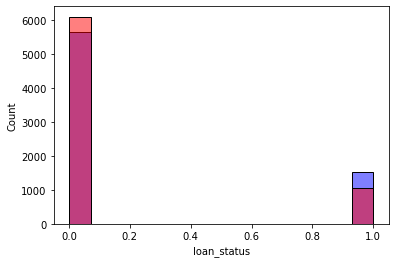

In [36]:
sns.histplot(y_test, color='blue',alpha=0.5)
sns.histplot(y_test_pre, color='red',alpha=0.5)

In [37]:
from sklearn.metrics import accuracy_score

accuracy_score_lr = accuracy_score(y_test, y_test_pre)
    
print('Accuracy score for Logistic Regression: ', accuracy_score_lr)

Accuracy score for Logistic Regression:  0.8578212290502794


### KNN Classification

In [38]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

classifier.fit(x_train_transformed,y_train)

KNeighborsClassifier()

In [39]:
y_test_pre = classifier.predict(x_test_transformed)

In [40]:
temp_df = pd.DataFrame({'Actual':y_test,'Predict':y_test_pre})
temp_df.head()

,Actual,Predict
17919,1,1
8088,0,0
29464,0,0
31640,0,0
30838,0,0


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

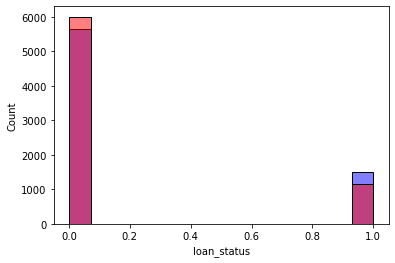

In [41]:
sns.histplot(y_test, color='blue',alpha=0.5)
sns.histplot(y_test_pre, color='red',alpha=0.5)

#### Accuracy

In [42]:
accuracy_score_knn = accuracy_score(y_test,y_test_pre)
print('acuuracy score: ',accuracy_score_knn)

acuuracy score:  0.8941340782122905


# Decision Tree classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(x_train_transformed,y_train)

DecisionTreeClassifier()

In [44]:
y_test_pre = classifier.predict(x_test_transformed)

In [45]:
temp_df = pd.DataFrame({'Actual':y_test,'Predict':y_test_pre})
temp_df.head()

,Actual,Predict
17919,1,1
8088,0,0
29464,0,0
31640,0,0
30838,0,0


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

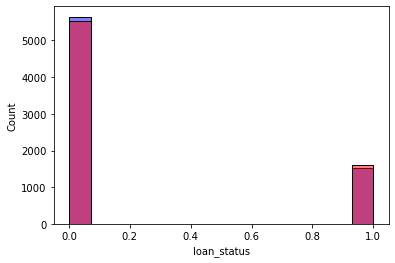

In [46]:
sns.histplot(y_test, color='blue',alpha=0.5)
sns.histplot(y_test_pre, color='red',alpha=0.5)

### Accuracy

In [47]:
accuracy_score_dtc = accuracy_score(y_test,y_test_pre)
print('accuracy score: ',accuracy_score_dtc)

accuracy score:  0.892877094972067


# Random Forest classification

In [48]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

classifier.fit(x_train_transformed,y_train)

RandomForestClassifier()

In [49]:
y_test_pre = classifier.predict(x_test_transformed)

In [50]:
temp_df = pd.DataFrame({'Actual':y_test,'Predict':y_test_pre})
temp_df.head()

,Actual,Predict
17919,1,1
8088,0,0
29464,0,0
31640,0,0
30838,0,0


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

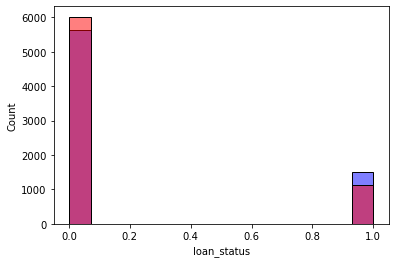

In [51]:
sns.histplot(y_test, color='blue',alpha=0.5)
sns.histplot(y_test_pre, color='red',alpha=0.5)

### Accuracy

In [52]:
accuracy_score_rfc = accuracy_score(y_test,y_test_pre)
print('accuracy score: ',accuracy_score_rfc)

accuracy score:  0.9365921787709497


# Support Vector Machines

In [53]:
from sklearn import svm

clf = svm.SVC(kernel='linear')

clf.fit(x_train_transformed, y_train)

SVC(kernel='linear')

In [54]:
y_test_pre = clf.predict(x_test_transformed)

In [55]:
temp_df = pd.DataFrame({'Actual':y_test,'Predict':y_test_pre})
temp_df.head()

,Actual,Predict
17919,1,0
8088,0,0
29464,0,0
31640,0,0
30838,0,0


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

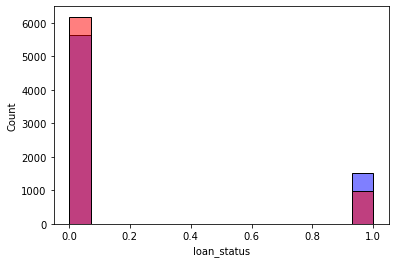

In [56]:
sns.histplot(y_test, color='blue',alpha=0.5)
sns.histplot(y_test_pre, color='red',alpha=0.5)

### Accuracy

In [57]:
accuracy_score_svm = accuracy_score(y_test,y_test_pre)
print("Accuracy score for support vector mechine",accuracy_score_svm)

Accuracy score for support vector mechine 0.8603351955307262


__Step - 7:__ Predict and evaluate each model separately using the correct evaluation metric. Use metrics.accuracy(actual, predict).

In [58]:
acc_data = {'Algorithem':['KNN Classification','Logistic Regression','Support Vector Mechine','Desicion Tree Classification','Random Forest Classification'],
            'accuracy_score':[accuracy_score_knn,accuracy_score_lr,accuracy_score_svm,accuracy_score_dtc,accuracy_score_rfc]}
acc_test = pd.DataFrame(acc_data)
acc_test

,Algorithem,accuracy_score
0,KNN Classification,0.894134
1,Logistic Regression,0.857821
2,Support Vector Mechine,0.860335
3,Desicion Tree Classification,0.892877
4,Random Forest Classification,0.936592


__Step - 8:__ Display a plot which shows all the algorithms applied along with the accuracies achieved. Write your conclusion on the best algorithm for Credit Risk Scoring.

<AxesSubplot:xlabel='Algorithem', ylabel='accuracy_score'>

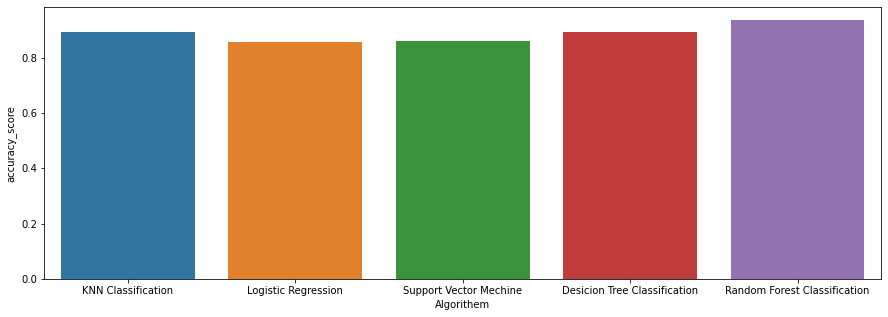

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.barplot(data=acc_test, x="Algorithem", y="accuracy_score")

- Random forest classification has maximum accuracy score when compared to other algorithems.
- i.e, for Credit risk scoring, random forest classification is best algorithem 